# Real Time Intelligent Systems
## Final Project - Client Application
### Roselyn R., Aashai A., Alberto B., Jaelynn K.

>[Packages](#scrollTo=IU5tHEvPQdlD)

>[Model](#scrollTo=r1YIS75rQ59a)

>[Trading System & Client](#scrollTo=Ojy95vT_RIYo)



## **Packages**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import keras
import socket
import threading
from IPython.display import display, clear_output

2024-06-01 11:06:09.917542: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


## **Model**

In [2]:
reconstructed_model = keras.models.load_model("chosen_model_rnn_aapl.keras")

In [3]:
def get_next_price_prediction(prices_list, days_back = -15):

    list_model = np.array(prices_list[days_back:])

    X = list_model.reshape(-1, 1)

    X_predict = np.reshape(X, (X.shape[0], 1, X.shape[1]))

    last_prediction = reconstructed_model.predict(X_predict[0:])

    return last_prediction[0][0]

## **Trading System & Client**

In [4]:
fig = plt.figure(figsize=(10, 8))

<Figure size 1000x800 with 0 Axes>

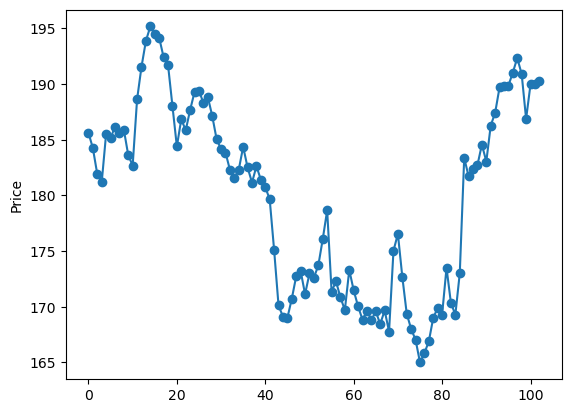

In [4]:
list_stock = []
list_signals = []
lock = threading.Lock()

def new_price(price):
    
    price_f = float(price)

    with lock:

        if len(list_stock) >= 15:
            next_open = get_next_price_prediction(list_stock)

            signal = 0

            if next_open > price_f:
                signal = 1
            elif next_open < price_f:
                signal = -1
            else:
                signal = 0

            list_signals.append(signal)

            print("Price: {}, Next Price: {}, Signal: {}".format(price_f,next_open,signal))

        else :
            list_signals.append(0)
            print("Price: {}, Not Enough Data to Predict Next Price".format(price_f))

        list_stock.append(price_f)
        
        clear_output(wait=True)

        plt.plot(list_stock, marker='o')
        plt.ylabel('Price')
        plt.show()
        print('\n')


def start_client(server_host, server_port):

    # Create Socket Object
    client_socket = socket.socket(socket.AF_INET, socket.SOCK_STREAM)

    # Connect to Server
    client_socket.connect((server_host, server_port))
    print(f"Connected to server {server_host}:{server_port}")

    # Receive Data from Server
    while True:
        data = client_socket.recv(1024).decode()
        if not data:
            break
        print(f"Received: {data}")
        new_price(data)


        # Send Acknowledgment
        client_socket.sendall("ACK".encode())

    # Close Connection
    client_socket.close()

# Start the Client
start_client('127.0.0.1', 65432)

In [5]:
list_signals

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 -1,
 -1,
 -1,
 -1,
 -1,
 1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 -1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1]